# Informe  

In [1]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import common.common_pandas_lib as common

In [2]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 12)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
sns.set_palette('Blues')
pd.options.display.float_format = '{:20,.8f}'.format # suprimimos la notacion cientifica en los outputs

In [3]:
zona_prop = common.cargar_train_optimizado('train.csv')

## ¿Cual es la cantidad de propiedades por provincia de Mexico? 

In [4]:
zona_prop['provincia'].isnull().sum()

155

In [5]:
zona_provincia = zona_prop.dropna(subset = ['provincia'])
zona_provincia = zona_provincia.copy()
zona_provincia['provincia'].isnull().sum()

0

In [6]:
provincias_cant = zona_provincia['provincia'].value_counts().to_frame()
provincias_cant.columns = ['cantidad_propiedades']
provincias_cant

,cantidad_propiedades
Distrito Federal,58790
Edo. de México,41607
Jalisco,21238
Querétaro,16988
Nuevo León,15324
Puebla,10421
San luis Potosí,8447
Yucatán,7928
Morelos,7337
Veracruz,5762


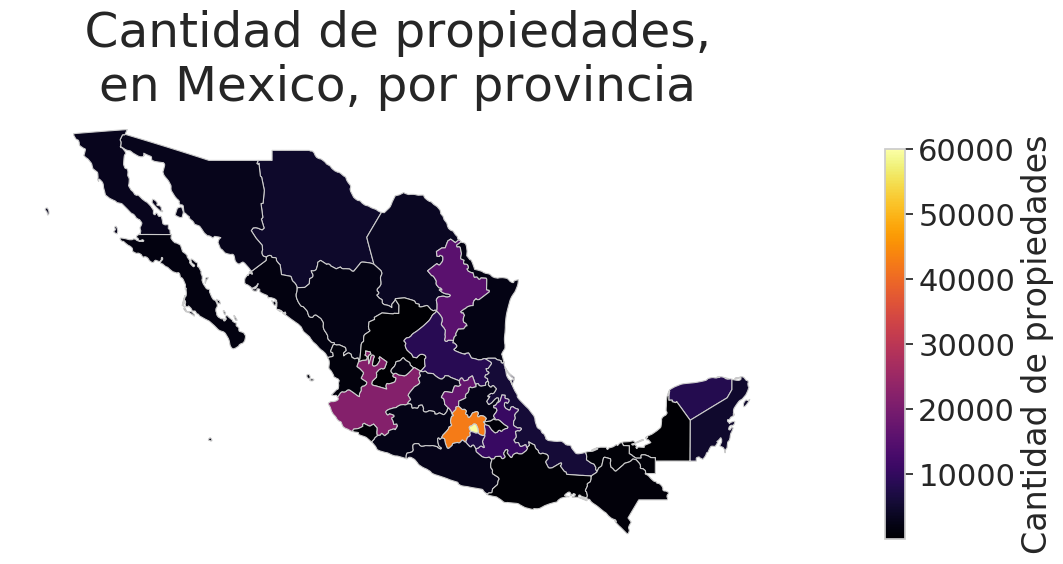

In [7]:
fig_mapa_prov_mex_cantidad, ax_mapa_prov_mex_cantidad = common.crear_mapa_provincias_mexico(
                                                                provincias_cant, 
                                                                'cantidad_propiedades',
                                                                50, 
                                                                60000, 
                                                                'inferno', 
                                                                False,
                                                                "Cantidad de propiedades"
                                                            )
common.setear_titulos_plot(
    ax_mapa_prov_mex_cantidad,
    " Cantidad de propiedades, \nen Mexico, por provincia"
)
#plt.tight_layout(pad = 1)
#plt.savefig("./plots/mapa_mexico_provincias_cantidad_propiedades.png")
plt.show()

In [8]:
provincias_cant.reset_index(inplace = True)
provincias_cant.columns = ['provincia', 'cantidad_propiedades']
provincias_cant

,provincia,cantidad_propiedades
0,Distrito Federal,58790
1,Edo. de México,41607
2,Jalisco,21238
3,Querétaro,16988
4,Nuevo León,15324
5,Puebla,10421
6,San luis Potosí,8447
7,Yucatán,7928
8,Morelos,7337
9,Veracruz,5762


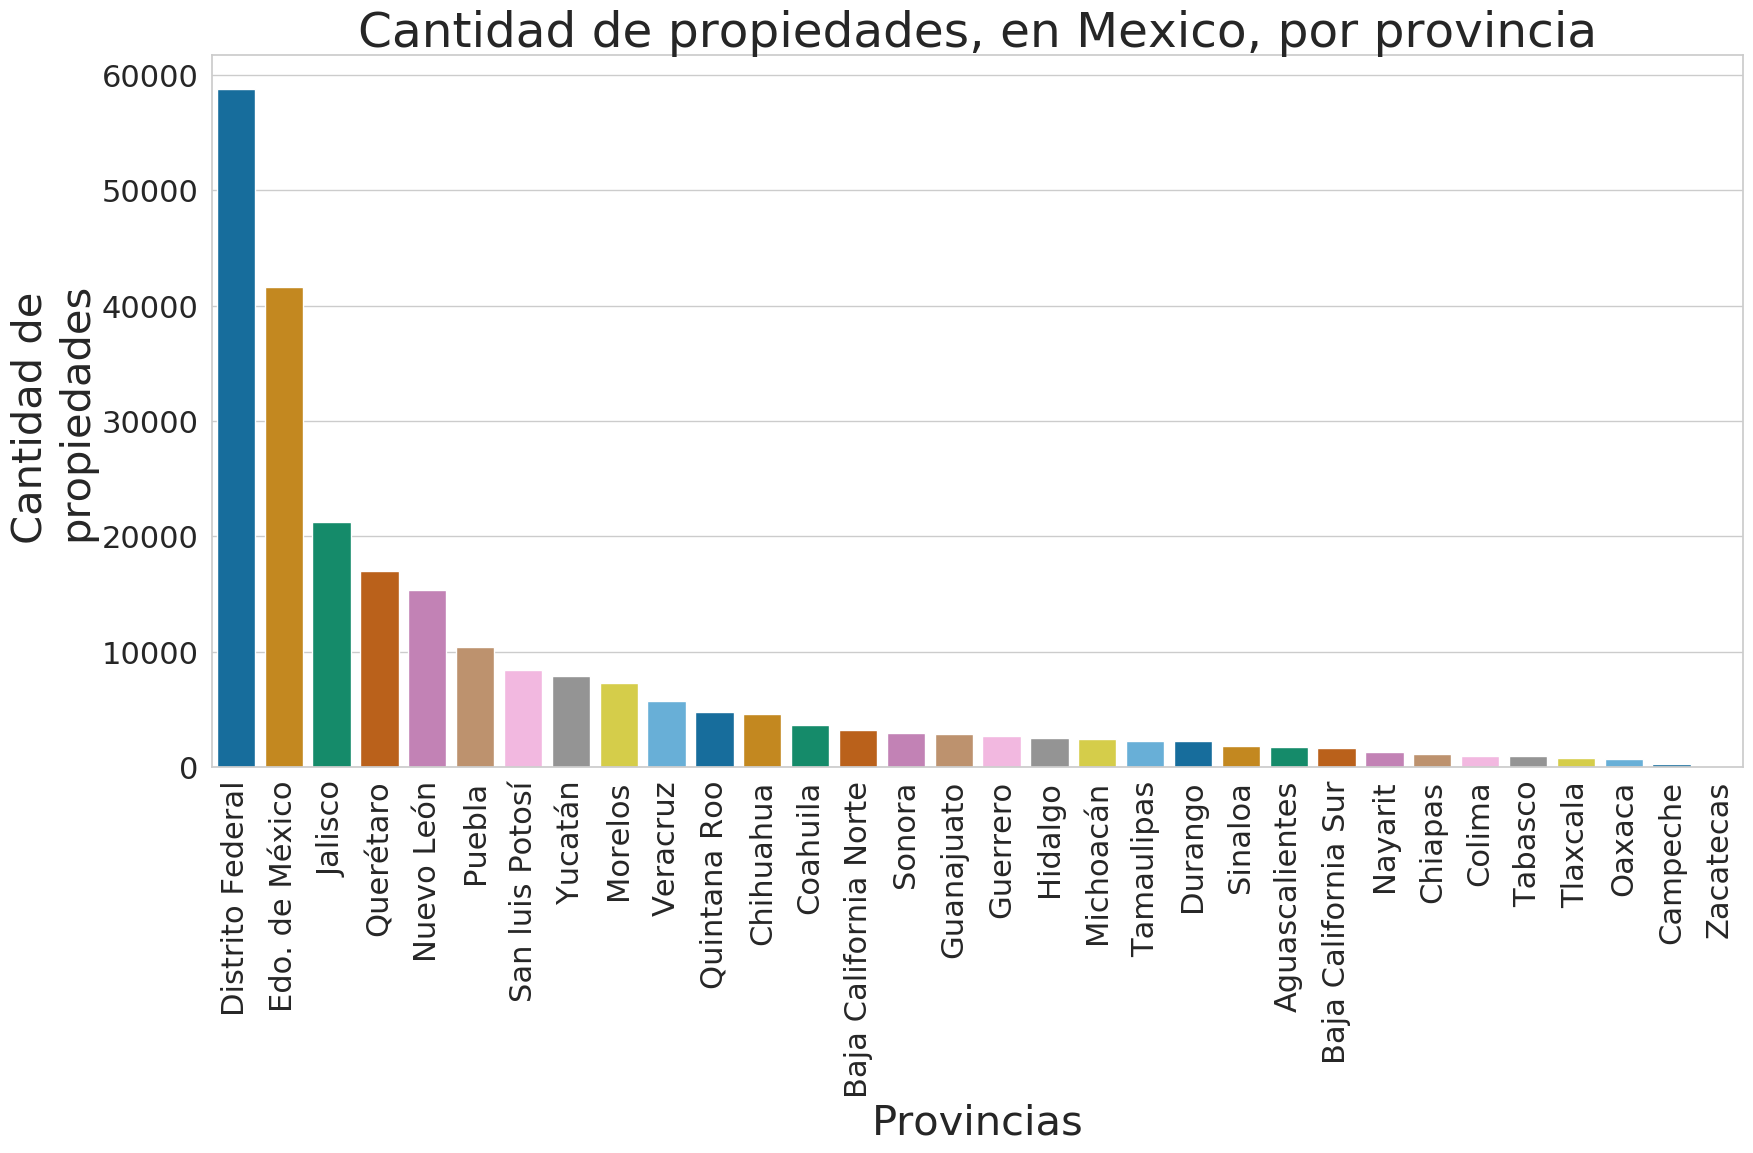

In [9]:
plot_barplot_provincias_cantidad = sns.barplot(
                                        x = 'provincia',
                                        y = 'cantidad_propiedades',
                                        data = provincias_cant,
                                        palette = 'colorblind'
                                    )

plot_barplot_provincias_cantidad.set_xticklabels(
    plot_barplot_provincias_cantidad.get_xticklabels(),
    rotation = 90
)

common.setear_titulos_plot(
    plot_barplot_provincias_cantidad,
    'Cantidad de propiedades, en Mexico, por provincia',
    'Provincias',
    'Cantidad de \npropiedades'
)
plt.tight_layout(pad = 1)
plot_barplot_provincias_cantidad.set_yticks([0, 10000, 20000, 30000, 40000, 50000, 60000])
fig_plot_barplot_provincias_cantidad = plot_barplot_provincias_cantidad.get_figure()
#fig_plot_barplot_provincias_cantidad.savefig('./plots/barplot_cantidad_propiedades_por_provincia.png')
plt.show()

### ¿Cuales son las provincias que tienen mas de 10000 propiedades?

In [10]:
provincias_cant_mayor_10_mil = provincias_cant.loc[provincias_cant['cantidad_propiedades'] >= 10000].copy()
provincias_cant_mayor_10_mil['provincia'] = provincias_cant_mayor_10_mil['provincia']
provincias_cant_mayor_10_mil['provincia'].dtype

dtype('O')

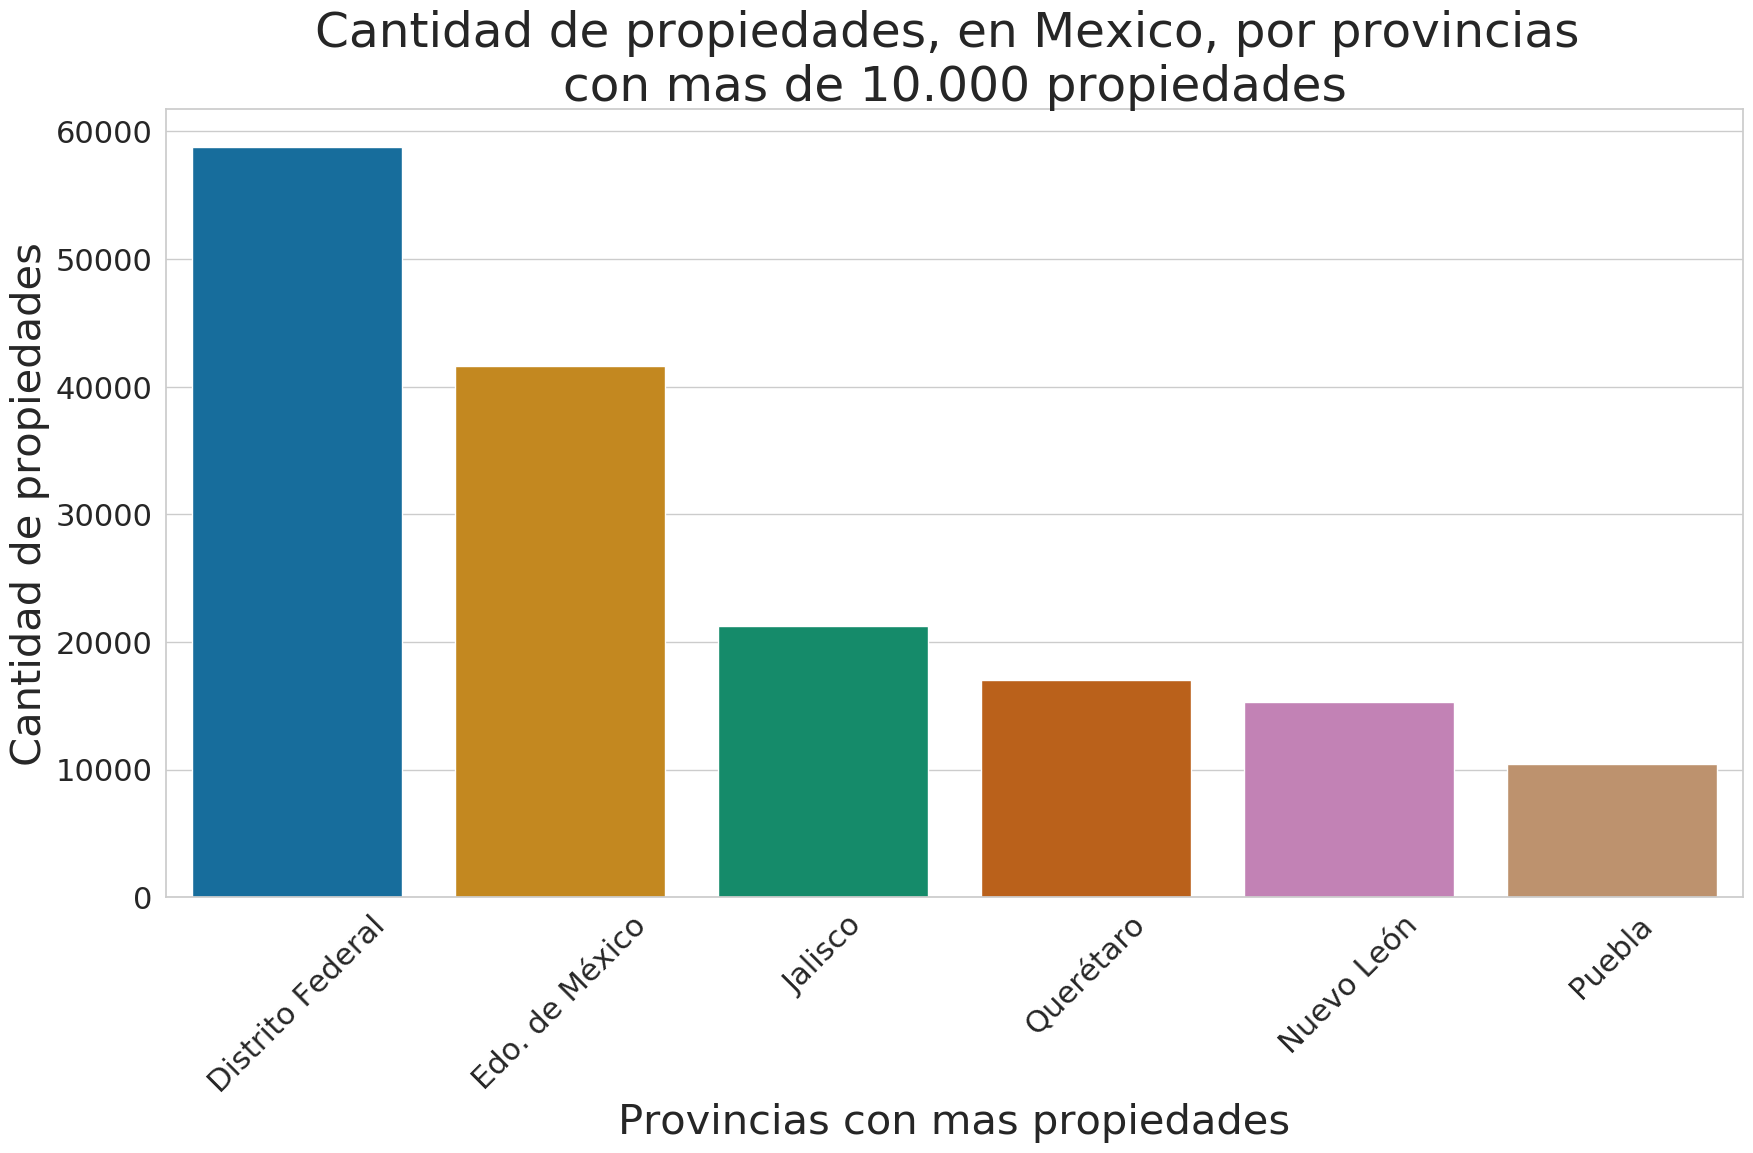

In [11]:
plot_barplot_provincias_cant_mayor_10_mil = sns.barplot(
                                                x = 'provincia',
                                                y = 'cantidad_propiedades',
                                                data = provincias_cant_mayor_10_mil,
                                                palette = 'colorblind'
                                            )

common.setear_titulos_plot(
    plot_barplot_provincias_cant_mayor_10_mil,
    'Cantidad de propiedades, en Mexico, por provincias \ncon mas de 10.000 propiedades',
    'Provincias con mas propiedades',
    'Cantidad de propiedades'
)

plot_barplot_provincias_cant_mayor_10_mil.set_xticklabels(
    plot_barplot_provincias_cant_mayor_10_mil.get_xticklabels(),
    rotation = 45
)
plt.tight_layout(pad = 1)
fig_plot_barplot_provincias_cant_mayor_10_mil = plot_barplot_provincias_cant_mayor_10_mil.get_figure()
#bfig_plot_barplot_provincias_cant_mayor_10_mil.savefig("./plots/barplot_cantidad_propiedades_provincias_mayor_10_mil.png")
plt.show()

In [12]:
provincias_cant_mayor_10_mil_merge = provincias_cant_mayor_10_mil.merge(zona_provincia, on = 'provincia', how = 'inner')
provincias_cant_mayor_10_mil_merge.sort_values(by = 'provincia', inplace = True)
provincias_cant_mayor_10_mil_merge

,provincia,cantidad_propiedades,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,antiguedad,habitaciones,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,Distrito Federal,58790,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,nan,2.00000000,...,"23,533.00000000",nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00000000"
39186,Distrito Federal,58790,89265,departamento en la roma,se remata excelente departamento en la roma \n...,Apartamento,"DURANGO, ROMA",Cuauhtémoc,5.00000000,3.00000000,...,"50,004,000.00000000",19.42026880,-99.16426940,2016-04-19,False,False,False,True,True,"1,210,000.00000000"
39187,Distrito Federal,58790,100048,propiedad en venta para oficinas.,se vende propiedad con muy buena ubicación! el...,Casa uso de suelo,"La carolina 54, Tepeyac Insurgentes",Gustavo A. Madero,5.00000000,8.00000000,...,"23,884.00000000",19.48035094,-99.12455418,2014-09-29,False,False,False,False,False,"3,650,000.00000000"
39188,Distrito Federal,58790,9087,departamento en venta - polanco,excelente departamento súper iluminado y solea...,Apartamento,Arquimides,Miguel Hidalgo,4.00000000,2.00000000,...,"275,358.00000000",19.43007562,-99.19135912,2015-07-11,False,False,False,True,True,"7,100,000.00000000"
39189,Distrito Federal,58790,79648,"casa en venta en agrícola oriental, iztacalco","casa en excelente estado, acogedora, iluminada...",Casa,Oriente 249-D,Iztacalco,40.00000000,5.00000000,...,"24,125.00000000",19.38856249,-99.07213211,2012-08-27,False,False,False,True,False,"2,250,000.00000000"
39190,Distrito Federal,58790,203516,jardines en la montaña exclusivo depto. con a...,exclusivo departamento con excelente ubicación...,Apartamento,CAMINO A SANTA TERESA,Tlalpan,0.00000000,2.00000000,...,"24,810.00000000",nan,nan,2015-03-06,True,False,False,True,True,"6,050,000.00000000"
39191,Distrito Federal,58790,175986,"venta en tlacopac, alvaro obregón","elegante c.h., ubicada en esq. con doble entra...",Casa en condominio,Barranca de Pilares,Alvaro Obregón,4.00000000,3.00000000,...,"23,145.00000000",19.35505140,-99.20405360,2014-03-07,False,False,False,False,False,"11,970,000.00000000"
39192,Distrito Federal,58790,213507,departamento en venta en pedregal de san nicolás,"unicamente 8 departamentos nuevos, uno por niv...",Apartamento,Tetiz 415,Tlalpan,1.00000000,2.00000000,...,"275,608.00000000",19.27835650,-99.23226530,2012-07-24,False,False,False,False,False,"1,155,000.00000000"
39193,Distrito Federal,58790,124655,casa en venta en condominio horizontal en ex h...,preciosa casa en condominio horizontal con jar...,Casa en condominio,CERRADA RANCHO XINTE,Tlalpan,5.00000000,3.00000000,...,"24,839.00000000",19.29537030,-99.12774880,2016-09-04,False,False,False,False,False,"4,395,000.00000000"
39194,Distrito Federal,58790,107819,departamento condesa venta para remodelar,<p><strong>remodela!!! </strong>&nbsp;departam...,Apartamento,Sinaloa,Cuauhtémoc,25.00000000,4.00000000,...,"23,815.00000000",19.42016170,-99.16983780,2013-10-24,False,False,False,True,False,"5,000,000.00000000"


### En las provincias con mayoria de propiedades, ¿Como se distribuye el precio de las mismas? 

In [13]:
provincias_cant_mayor_10_mil_estadist = common.agrupar_calcular_estadisticas_desagrupar(provincias_cant_mayor_10_mil_merge, 'provincia', 'precio')
provincias_cant_mayor_10_mil_estadist.sort_values(by = 'provincia', inplace = True)
for columna in ['precio_cuantil_1', 'precio_median', 'precio_cuantil_3']:
    provincias_cant_mayor_10_mil_estadist[columna + '_millones'] = provincias_cant_mayor_10_mil_estadist[columna].transform(lambda x: x*1e-6)
provincias_cant_mayor_10_mil_estadist

,provincia,precio_cuantil_1,precio_median,precio_cuantil_3,precio_cuantil_1_millones,precio_median_millones,precio_cuantil_3_millones
0,Distrito Federal,"1,500,000.00000000","2,800,000.00000000","4,700,000.00000000",1.50000000,2.80000000,4.70000000
1,Edo. de México,"900,000.00000000","2,000,000.00000000","3,950,000.00000000",0.90000000,2.00000000,3.95000000
2,Jalisco,"930,000.00000000","1,750,000.00000000","3,200,000.00000000",0.93000000,1.75000000,3.20000000
3,Nuevo León,"900,000.00000000","1,900,000.00000000","3,716,475.00000000",0.90000000,1.90000000,3.71647500
4,Puebla,"990,000.00000000","1,870,000.00000000","2,950,000.00000000",0.99000000,1.87000000,2.95000000
5,Querétaro,"1,196,875.00000000","1,850,000.00000000","2,800,000.00000000",1.19687500,1.85000000,2.80000000


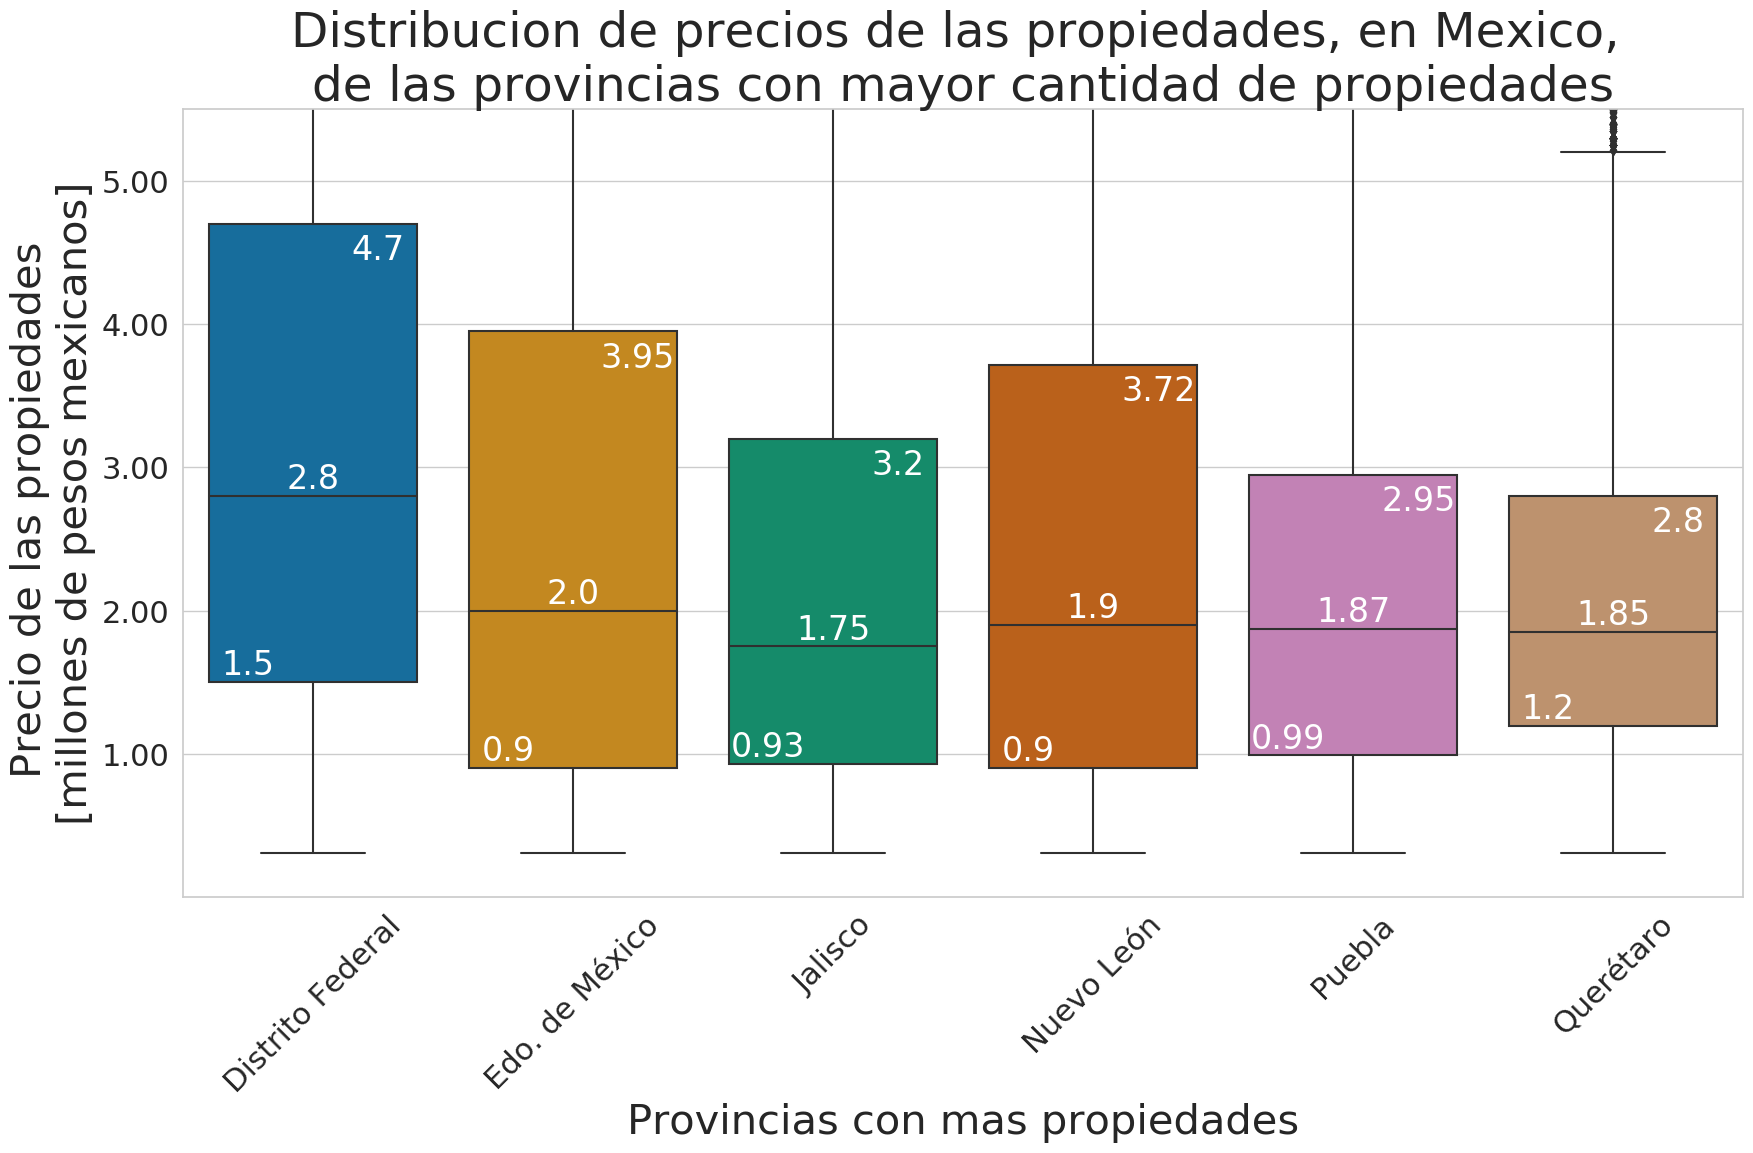

In [14]:
plot_boxplot_provincias_top_precios = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            data = provincias_cant_mayor_10_mil_merge,
                                            palette = 'colorblind'
                                        )
plot_boxplot_provincias_top_precios.set_yticks([1000000,2000000, 3000000, 4000000, 5000000])

common.setear_titulos_plot(
    plot_boxplot_provincias_top_precios,
    'Distribucion de precios de las propiedades, en Mexico, \nde las provincias con mayor cantidad de propiedades',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

common.agregar_serie_plot(
    plot_boxplot_provincias_top_precios,
    provincias_cant_mayor_10_mil_estadist['precio_median_millones'],
    provincias_cant_mayor_10_mil_estadist['precio_median'],
    'w',
    0,50000
)


common.agregar_serie_plot(
    plot_boxplot_provincias_top_precios,
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_1_millones'],
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_1'],
    'w',
    -0.25,50000
)

common.agregar_serie_plot(
    plot_boxplot_provincias_top_precios,
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_3_millones'],
    provincias_cant_mayor_10_mil_estadist['precio_cuantil_3'],
    'w',
    0.25,-250000
)

plot_boxplot_provincias_top_precios.set_xticklabels(
    plot_boxplot_provincias_top_precios.get_xticklabels(),
    rotation = 45
)

#plot_boxplot_provincias_top_precios.ticklabel_format(style = 'plain', axis = 'y')
plot_boxplot_provincias_top_precios.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.2f" % (x*1e-6))
)

plot_boxplot_provincias_top_precios.set_ylim(0,5500000)

fig_plot_boxplot_provincias_top_precios = plot_boxplot_provincias_top_precios.get_figure()
fig_plot_boxplot_provincias_top_precios.set_size_inches(18,12)
plt.tight_layout(pad = 1)
#fig_plot_boxplot_provincias_top_precios.savefig("./plots/boxplot_provincias_mayor_propiedades_precios.png")
plt.show()

### En las provincias con mayoria de propieades ¿Como se distribuye el precio de las mismas, segun la cantidad de baños? 

In [15]:
top_6_prov = provincias_cant_mayor_10_mil_merge
top_6_prov_banos = top_6_prov.dropna(subset = ['banos']).copy()
top_6_prov_banos['banos'] = top_6_prov_banos['banos'].astype(np.int8)
top_6_prov_banos['banos'].isnull().sum()

0

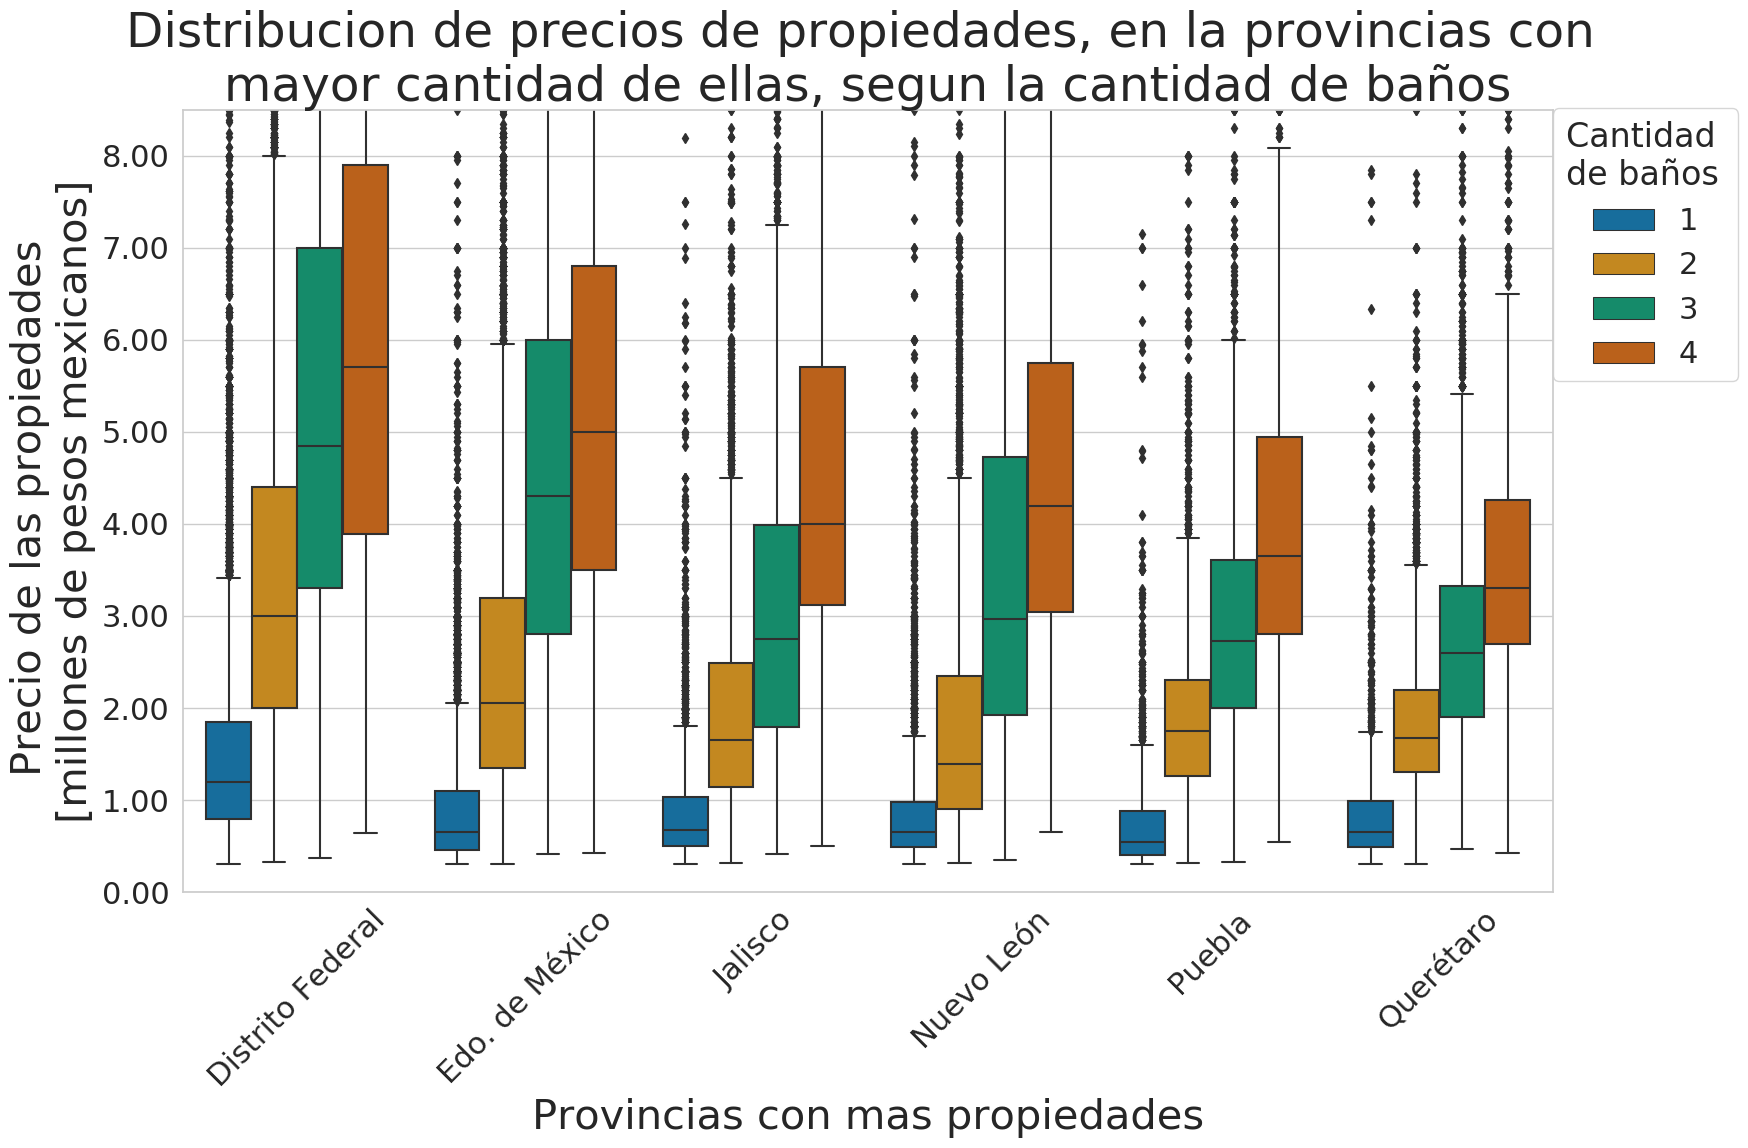

In [16]:
plot_boxplot_top_6_prov_banos_precio = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            hue = 'banos',
                                            data = top_6_prov_banos,
                                            palette = 'colorblind'
                                        )
common.setear_titulos_plot(
    plot_boxplot_top_6_prov_banos_precio,
    'Distribucion de precios de propiedades, en la provincias con \nmayor cantidad de ellas, segun la cantidad de baños',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]' 
)

plot_boxplot_top_6_prov_banos_precio.legend(title = 'Cantidad \nde baños', loc = [1, 0.653])

plot_boxplot_top_6_prov_banos_precio.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.2f" % (x*1e-6))
)

plot_boxplot_top_6_prov_banos_precio.set_xticklabels(
    plot_boxplot_top_6_prov_banos_precio.get_xticklabels(),
    rotation = 45
)

plot_boxplot_top_6_prov_banos_precio.set_ylim(0, 8500000)


fig_plot_boxplot_top_6_prov_banos_precio = plot_boxplot_top_6_prov_banos_precio.get_figure()
plt.tight_layout()
#fig_plot_boxplot_top_6_prov_banos_precio.savefig("./plots/boxplot_precios_top_6_provincias_segun_banos.png")
plt.show()

### En las provincias con mayoria de propiedades, ¿Como se distribuye el precio segun la cantidad de habitaciones? 

In [17]:
top_6_prov_habitaciones = top_6_prov.dropna(subset = ['habitaciones']).copy()
top_6_prov_habitaciones['habitaciones'] = top_6_prov_habitaciones['habitaciones'].astype(np.int8)
top_6_prov_habitaciones['habitaciones'].dtype

dtype('int8')

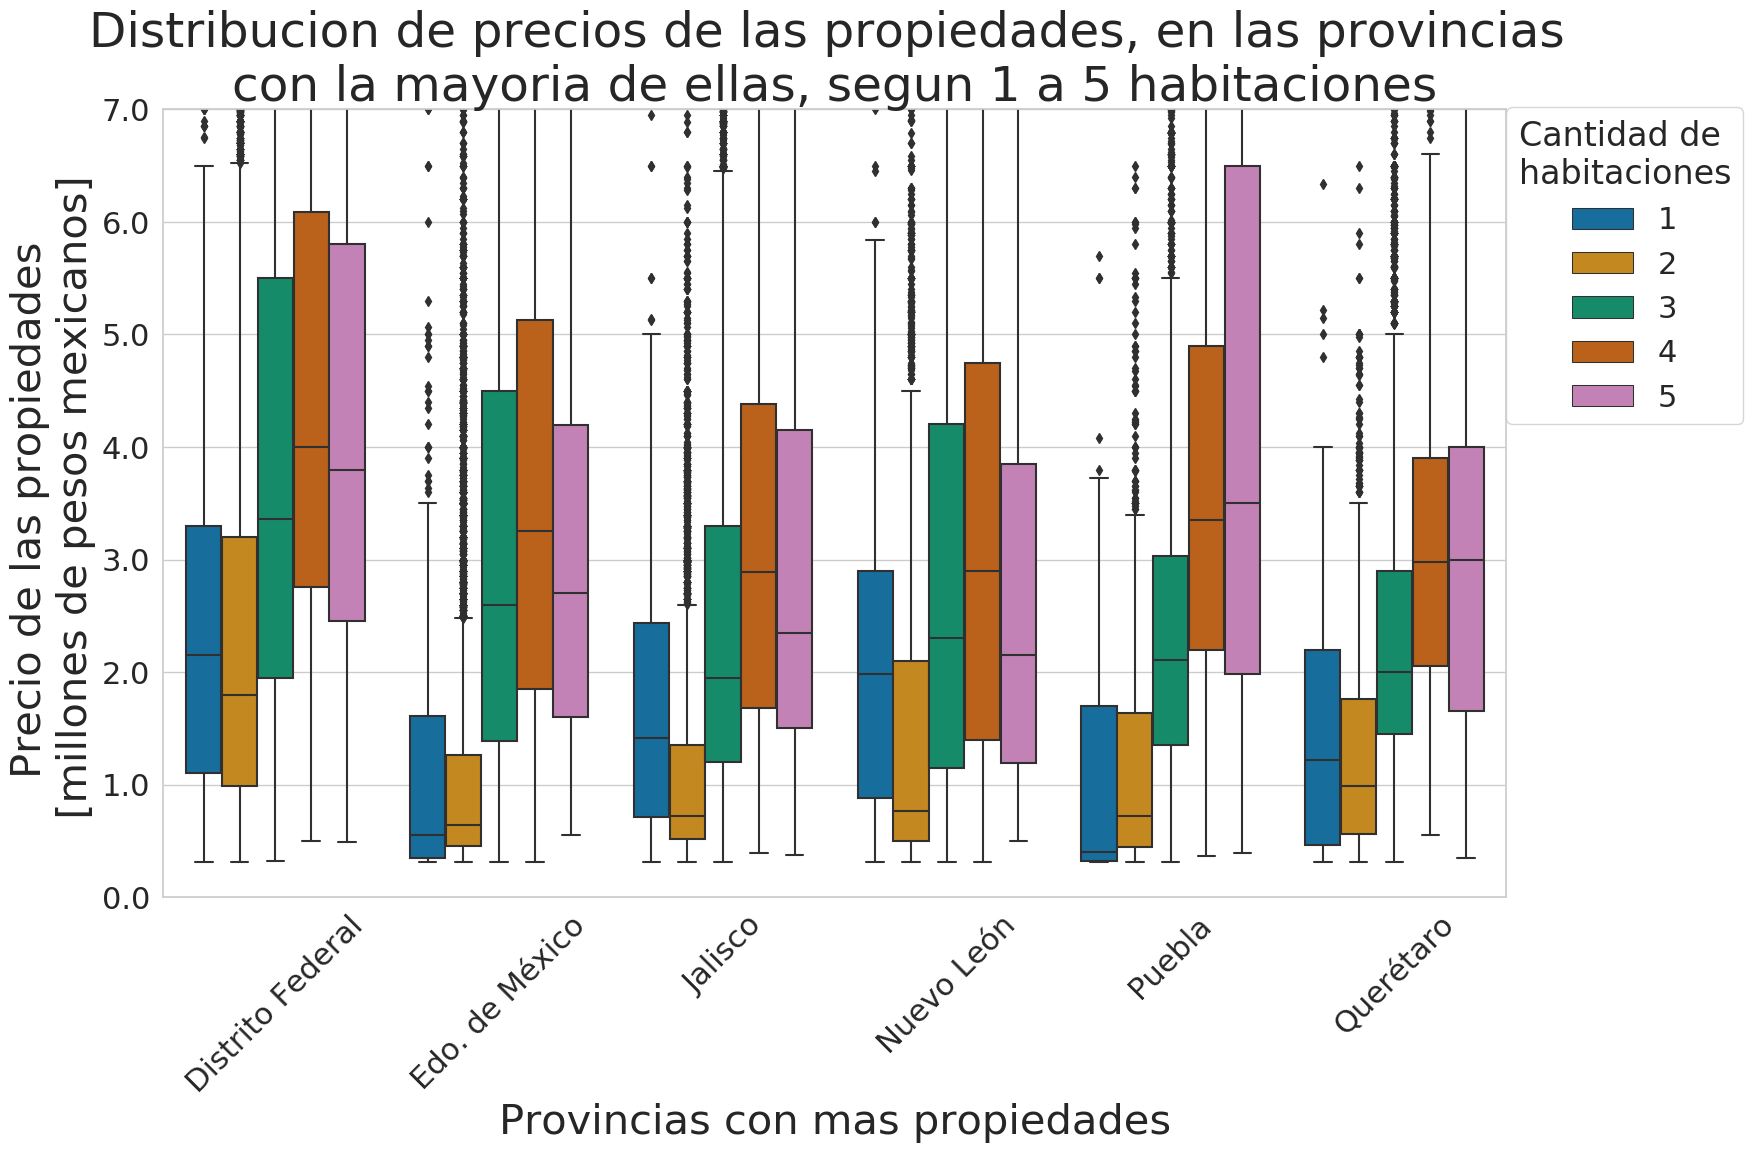

In [18]:
boxplot_top_6_prov_precio_habitaciones_hasta_5 = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            hue = 'habitaciones',
                                            data = top_6_prov_habitaciones.loc[top_6_prov_habitaciones['habitaciones'] <= 5],
                                            palette = 'colorblind'                                        )


boxplot_top_6_prov_precio_habitaciones_hasta_5.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6)))

common.setear_titulos_plot(
    boxplot_top_6_prov_precio_habitaciones_hasta_5,
    'Distribucion de precios de las propiedades, en las provincias \ncon la mayoria de ellas, segun 1 a 5 habitaciones',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n [millones de pesos mexicanos]'
)

plt.legend(title = 'Cantidad de \nhabitaciones', loc = [1,0.6])

boxplot_top_6_prov_precio_habitaciones_hasta_5.set_xticklabels(
    boxplot_top_6_prov_precio_habitaciones_hasta_5.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_prov_precio_habitaciones_hasta_5.set_ylim(0,7*1e6)

fig_boxplot_top_6_prov_precio_habitaciones_hasta_5 =\
    boxplot_top_6_prov_precio_habitaciones_hasta_5.get_figure()

plt.tight_layout(pad = 1)
#fig_boxplot_top_6_prov_precio_habitaciones_hasta_5.savefig("./plots/boxplot_top_6_provincias_precio_habitaciones_6_10.png")
plt.show()

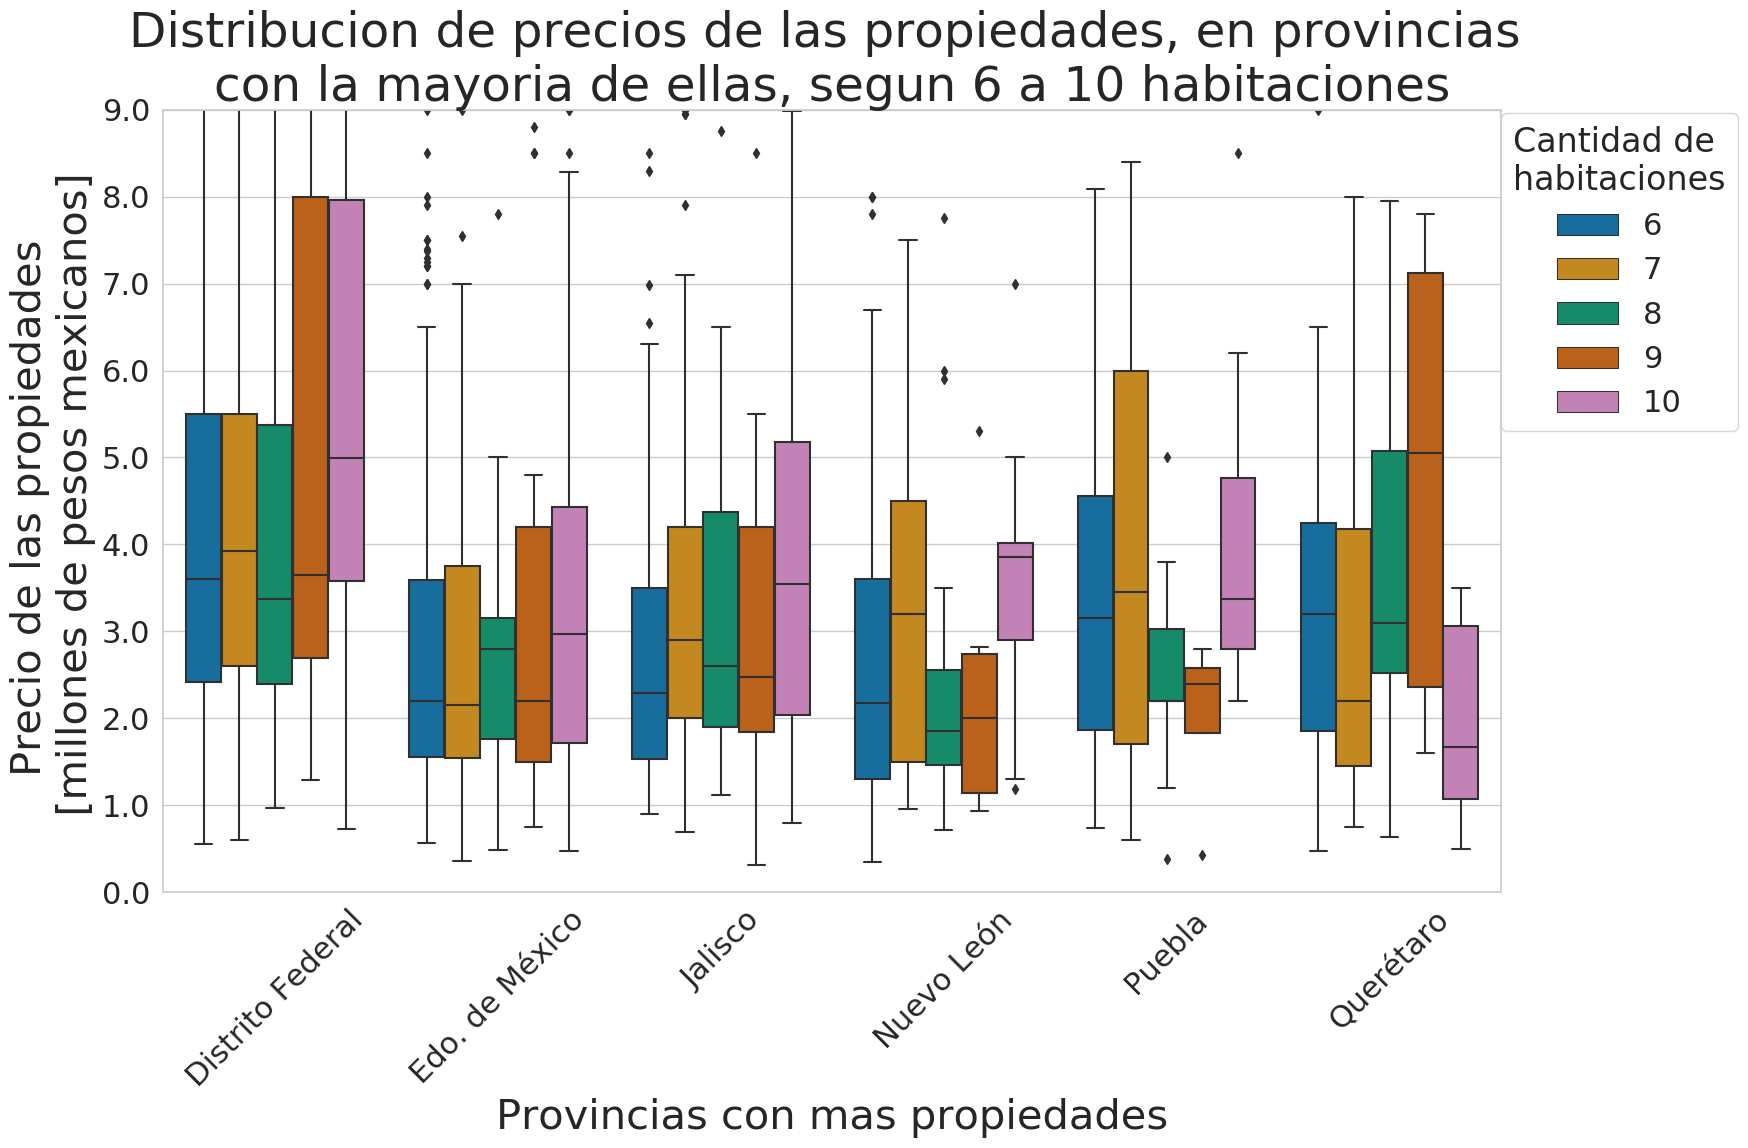

In [19]:
boxplot_top_6_prov_precio_habitaciones_desde_6 = sns.boxplot(
                                            x = 'provincia',
                                            y = 'precio',
                                            hue = 'habitaciones',
                                            data = top_6_prov_habitaciones.loc[top_6_prov_habitaciones['habitaciones'] > 5],
                                            palette = sns.color_palette('colorblind'),
                                        )

common.setear_titulos_plot(
    boxplot_top_6_prov_precio_habitaciones_desde_6,
    'Distribucion de precios de las propiedades, en provincias \ncon la mayoria de ellas, segun 6 a 10 habitaciones',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n [millones de pesos mexicanos]'
)

plt.legend(title = 'Cantidad de \nhabitaciones', loc = [1,0.59])

boxplot_top_6_prov_precio_habitaciones_desde_6.set_xticklabels(
    boxplot_top_6_prov_precio_habitaciones_desde_6.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_prov_precio_habitaciones_desde_6.set_ylim(0,9*1e6)

boxplot_top_6_prov_precio_habitaciones_desde_6.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)


fig_boxplot_top_6_prov_precio_habitaciones_desde_6 =\
    boxplot_top_6_prov_precio_habitaciones_desde_6.get_figure()

plt.tight_layout()
#fig_boxplot_top_6_prov_precio_habitaciones_desde_6.savefig("./plots/boxplot_top_6_provincias_precio_habitaciones_1_5.png")
plt.show()

### En las provincias con mayoria de propiedades, ¿como se distribuye el precio de las mismas, segun la cantidad de garages? 

In [20]:
top_6_prov_garages = top_6_prov.dropna(subset = ['garages']).copy()
top_6_prov_garages['garages'] = top_6_prov_garages['garages'].astype(np.int8)
top_6_prov_garages['garages'].dtype

dtype('int8')

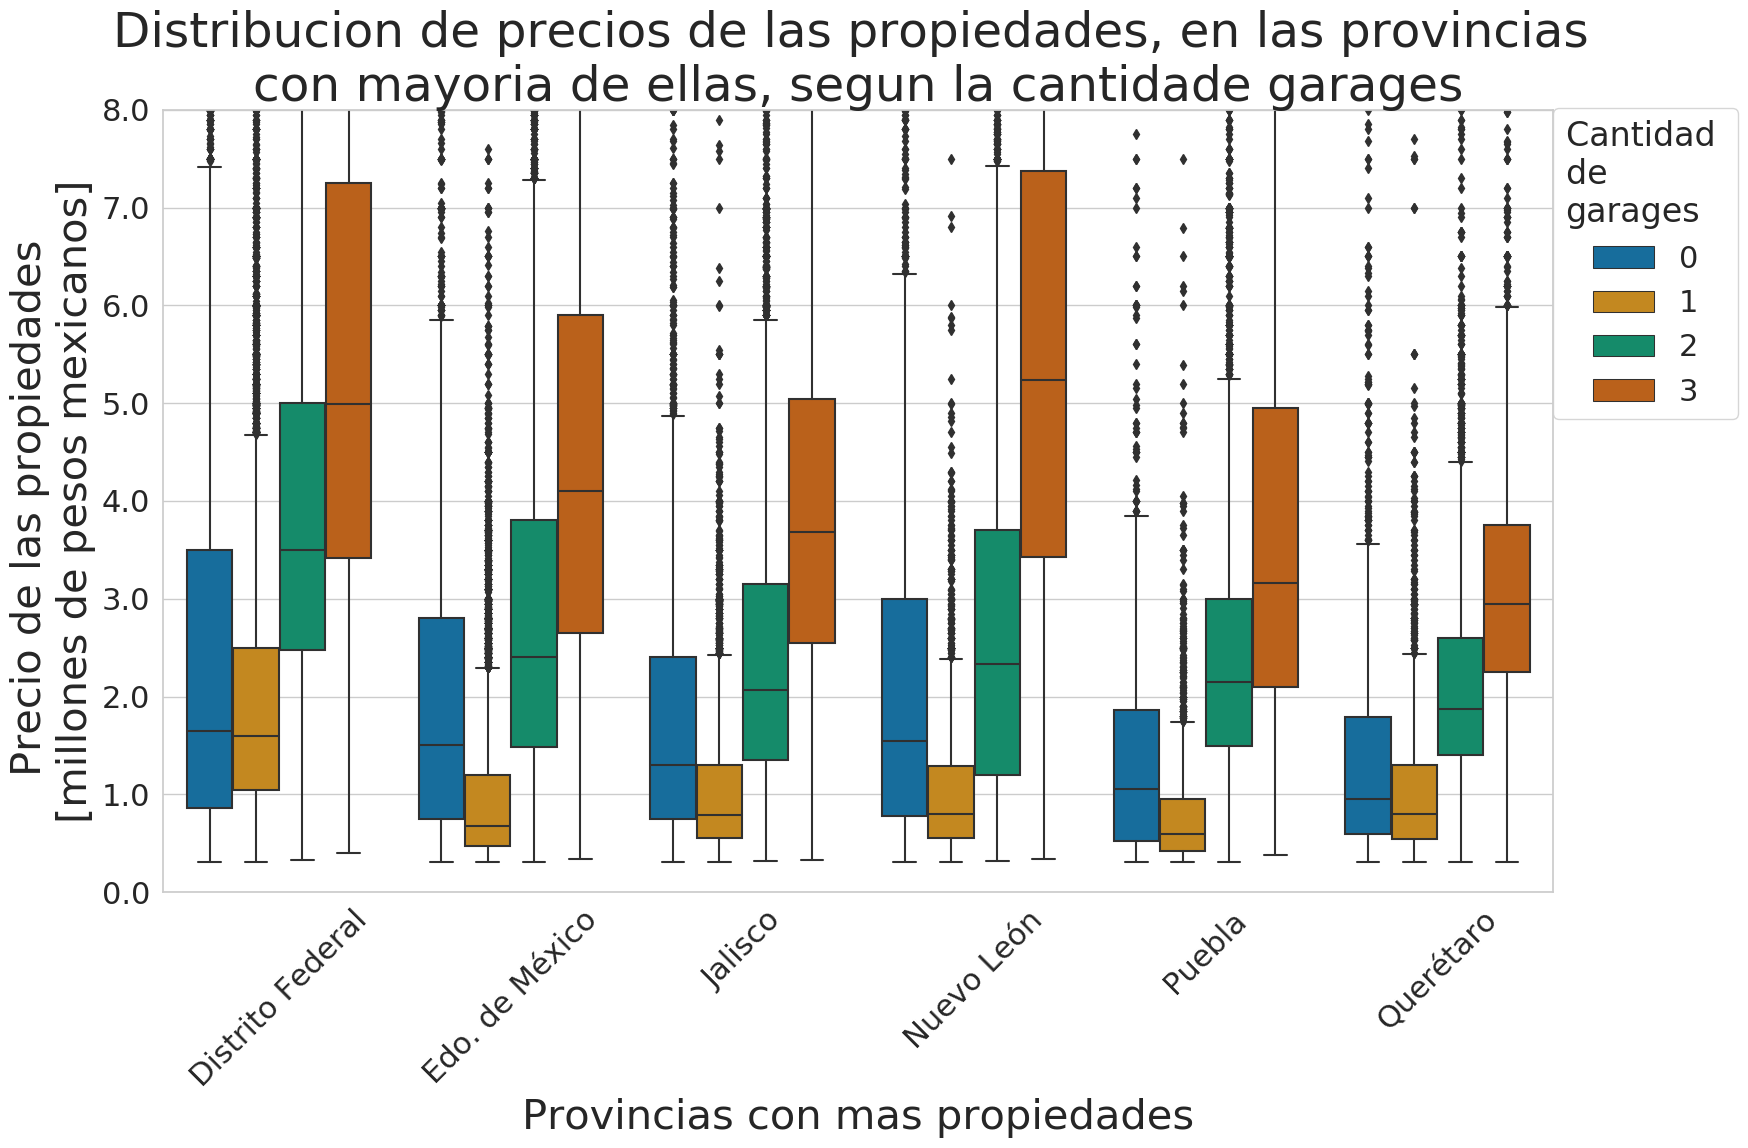

In [21]:
boxplot_top_6_prov_precio_garages = sns.boxplot(
                                        x = 'provincia',
                                        y = 'precio',
                                        hue = 'garages',
                                        data = top_6_prov_garages,
                                        palette = 'colorblind'
                                    )

common.setear_titulos_plot(
    boxplot_top_6_prov_precio_garages,
    'Distribucion de precios de las propiedades, en las provincias \ncon mayoria de ellas, segun la cantidade garages',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_6_prov_precio_garages.set_xticklabels(
    boxplot_top_6_prov_precio_garages.get_xticklabels(),
    rotation = 45
)

plt.legend(title = 'Cantidad \nde \ngarages', loc = [1,0.605])

boxplot_top_6_prov_precio_garages.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

boxplot_top_6_prov_precio_garages.set_ylim(0,8*1e6)

fig_boxplot_top_6_prov_precio_garages = boxplot_top_6_prov_precio_garages.get_figure()

plt.tight_layout()
#fig_boxplot_top_6_prov_precio_garages.savefig('./plots/boxplot_top_6_provincias_precio_garages.png')
plt.show()

In [22]:
top_6_prov['escuelascercanas'].isnull().sum()

0

In [23]:
top_6_prov['centroscomercialescercanos'].isnull().sum()

0

In [24]:
top_6_prov_cosas_cercanas_precio = top_6_prov.melt(id_vars = ['provincia', 'precio'], value_vars = ['escuelascercanas', 'centroscomercialescercanos'])
top_6_prov_cosas_cercanas_precio.columns = ['provincia', 'precio', 'cosas_cercanas', 'estan_cerca']
top_6_prov_cosas_cercanas_precio = common.columna_bool_a_si_no(
                                                        top_6_prov_cosas_cercanas_precio, 
                                                        'estan_cerca'
                                                    )
top_6_prov_cosas_cercanas_precio['cosas_cercanas'] =\
    top_6_prov_cosas_cercanas_precio['cosas_cercanas'].transform(
        lambda x: 'Escuelas cercanas : ' if x == 'escuelascercanas' else 'Centros comerciales cercanos : '
    )
top_6_prov_cosas_cercanas_precio['leyenda_cosas_cercanas'] =\
    top_6_prov_cosas_cercanas_precio['cosas_cercanas'] + top_6_prov_cosas_cercanas_precio['estan_cerca']
top_6_prov_cosas_cercanas_precio

,provincia,precio,cosas_cercanas,estan_cerca,leyenda_cosas_cercanas
0,Distrito Federal,"2,273,000.00000000",Escuelas cercanas :,No,Escuelas cercanas : No
1,Distrito Federal,"1,210,000.00000000",Escuelas cercanas :,Si,Escuelas cercanas : Si
2,Distrito Federal,"3,650,000.00000000",Escuelas cercanas :,No,Escuelas cercanas : No
3,Distrito Federal,"7,100,000.00000000",Escuelas cercanas :,Si,Escuelas cercanas : Si
4,Distrito Federal,"2,250,000.00000000",Escuelas cercanas :,Si,Escuelas cercanas : Si
5,Distrito Federal,"6,050,000.00000000",Escuelas cercanas :,Si,Escuelas cercanas : Si
6,Distrito Federal,"11,970,000.00000000",Escuelas cercanas :,No,Escuelas cercanas : No
7,Distrito Federal,"1,155,000.00000000",Escuelas cercanas :,No,Escuelas cercanas : No
8,Distrito Federal,"4,395,000.00000000",Escuelas cercanas :,No,Escuelas cercanas : No
9,Distrito Federal,"5,000,000.00000000",Escuelas cercanas :,Si,Escuelas cercanas : Si


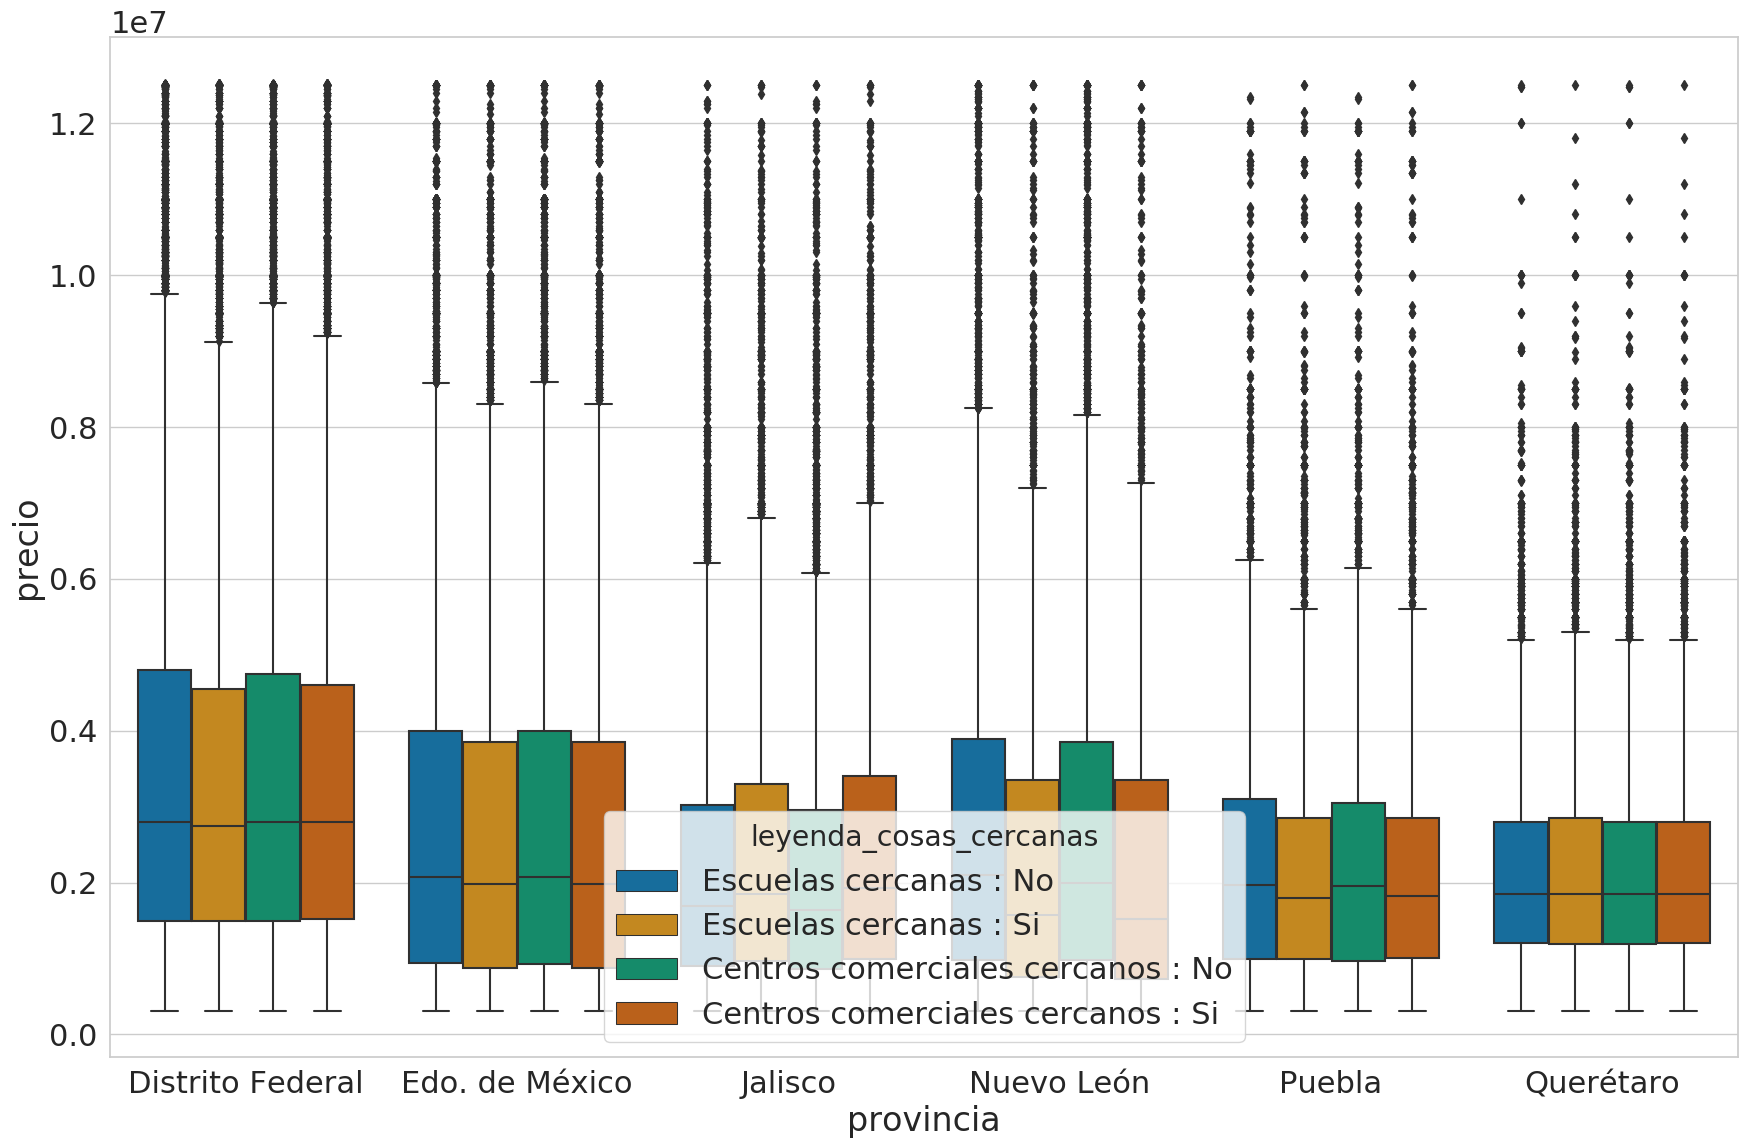

In [25]:
boxplot_top_6_provincia_precio_cosas_cercanas = sns.boxplot(
                                                    x = 'provincia',
                                                    y = 'precio',
                                                    hue = 'leyenda_cosas_cercanas',
                                                    data = top_6_prov_cosas_cercanas_precio,
                                                    palette = 'colorblind'
                                                )

plt.tight_layout()
plt.show()

In [64]:
def etiquetar_cosas_cercanas(fila):
    if ((fila['escuelascercanas'] == True) and (fila['centroscomercialescercanos'] == True)):
        return 'Escuelas y centros comerciales'
    if (fila['escuelascercanas'] == True):
        return 'Solo escuelas'
    if (fila['centroscomercialescercanos'] == True):
        return 'Solo centros comerciales'
    return 'Ninguno'
top_6_prov_cosas_cercanas_2 = top_6_prov.copy()
top_6_prov_cosas_cercanas_precio_2 = top_6_prov_cosas_cercanas[['provincia', 'escuelascercanas', 'centroscomercialescercanos', 'precio']].copy()
top_6_prov_cosas_cercanas_precio_2['cosas_cercanas'] = top_6_prov_cosas_cercanas_precio_2.apply(lambda fila: etiquetar_cosas_cercanas(fila), axis = 1)
top_6_prov_cosas_cercanas_precio_2

,provincia,escuelascercanas,centroscomercialescercanos,precio,cosas_cercanas
0,Distrito Federal,False,False,"2,273,000.00000000",Ninguno
39186,Distrito Federal,True,True,"1,210,000.00000000",Escuelas y centros comerciales
39187,Distrito Federal,False,False,"3,650,000.00000000",Ninguno
39188,Distrito Federal,True,True,"7,100,000.00000000",Escuelas y centros comerciales
39189,Distrito Federal,True,False,"2,250,000.00000000",Solo escuelas
39190,Distrito Federal,True,True,"6,050,000.00000000",Escuelas y centros comerciales
39191,Distrito Federal,False,False,"11,970,000.00000000",Ninguno
39192,Distrito Federal,False,False,"1,155,000.00000000",Ninguno
39193,Distrito Federal,False,False,"4,395,000.00000000",Ninguno
39194,Distrito Federal,True,False,"5,000,000.00000000",Solo escuelas


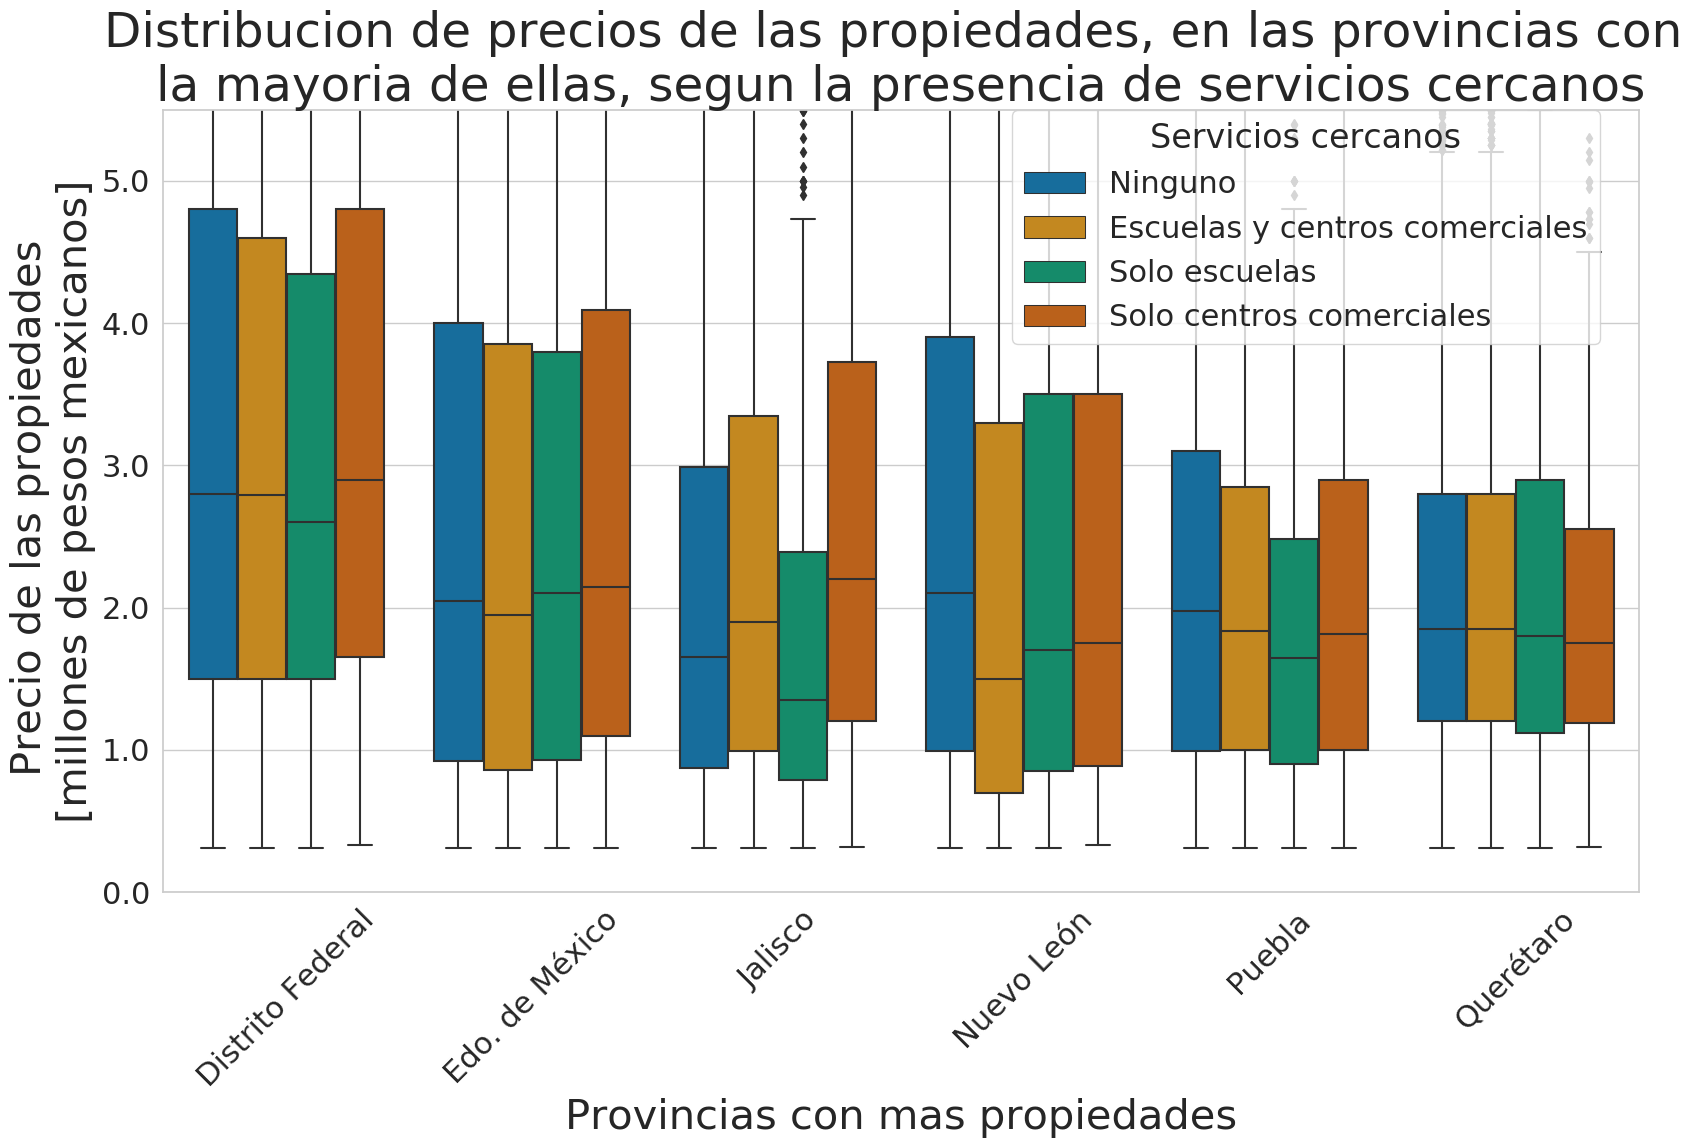

In [66]:
boxplot_top_6_provincias_cosas_cercanas_2 = sns.boxplot(
                                                x = 'provincia',
                                                y = 'precio',
                                                hue = 'cosas_cercanas',
                                                data = top_6_prov_cosas_cercanas_precio_2,
                                                palette = 'colorblind'
                                            )

common.setear_titulos_plot(
    boxplot_top_6_provincias_cosas_cercanas_2,
    'Distribucion de precios de las propiedades, en las provincias con \nla mayoria de ellas, segun la presencia de servicios cercanos',
    'Provincias con mas propiedades',
    'Precio de las propiedades \n[millones de pesos mexicanos]'
)

boxplot_top_6_provincias_cosas_cercanas_2.set_xticklabels(
    boxplot_top_6_provincias_cosas_cercanas_2.get_xticklabels(),
    rotation = 45
)

boxplot_top_6_provincias_cosas_cercanas_2.set_ylim(0,5500000)

plt.legend(title = 'Servicios cercanos', loc = [0.575,0.7])

boxplot_top_6_provincias_cosas_cercanas_2.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: "%0.1f" % (x*1e-6))
)

fig_boxplot_top_6_provincias_cosas_cercanas_2 =\
    boxplot_top_6_provincias_cosas_cercanas_2.get_figure()
plt.tight_layout() 
plt.show()